<a href="https://colab.research.google.com/github/rc-dbe/bigdatacertification/blob/master/Data_Mining_Model_Structured_Data_(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Hands-on of Big Data Analyst with TuV Certified Qualification*


---



# 2. Data Mining Model - Structured Data (Part 2)

Sub topics covered in this practice:
* Classification
* Clustering
* Association

### Classification

In [1]:
# Import Library
import pandas as pd

#Import the files to Google Colab
url = 'https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/churn_trasnsformed_new.csv'
df_csv = pd.read_csv(url, sep=',',)

# Show 10 first Row
df_csv.head()

,Unnamed: 0,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2985,2985.0,0
1,1,1,0,0,1,1,0,0,1,34,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,5695,18895.0,0
2,2,1,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,5385,10815.0,1
3,3,1,0,0,1,1,0,0,1,45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,423,184075.0,0
4,4,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,707,15165.0,1


In [2]:
# Remove "Unnamed:O" Coloumn
df = df_csv.drop("Unnamed: 0", axis=1)
df.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2985,2985.0,0
1,1,0,0,1,1,0,0,1,34,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,5695,18895.0,0
2,1,0,0,1,1,0,0,1,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,5385,10815.0,1
3,1,0,0,1,1,0,0,1,45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,423,184075.0,0
4,0,1,0,1,1,0,0,1,2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,707,15165.0,1


In [3]:
# Check the Data Infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
gender_0              7043 non-null int64
gender_1              7043 non-null int64
SeniorCitizen_0       7043 non-null int64
SeniorCitizen_1       7043 non-null int64
Partner_0             7043 non-null int64
Partner_1             7043 non-null int64
Dependents_0          7043 non-null int64
Dependents_1          7043 non-null int64
tenure                7043 non-null int64
PhoneService_0        7043 non-null int64
PhoneService_1        7043 non-null int64
MultipleLines_0       7043 non-null int64
MultipleLines_1       7043 non-null int64
MultipleLines_2       7043 non-null int64
InternetService_0     7043 non-null int64
InternetService_1     7043 non-null int64
InternetService_2     7043 non-null int64
OnlineSecurity_0      7043 non-null int64
OnlineSecurity_1      7043 non-null int64
OnlineSecurity_2      7043 non-null int64
OnlineBackup_0        7043 non-null int64
OnlineBacku

In [4]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
column_names = df.columns.tolist()
column_names.remove('Churn')

# Standardize all attributes
df[column_names] = standard_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)
df.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,-1.009559,1.009559,-0.439916,0.439916,-1.034530,1.034530,-0.654012,0.654012,-1.277445,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,-1.006696,0.633933,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.146486,-0.639983,0
1,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.066327,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,-1.116820,0.599097,-0.557287,0
2,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,1.109785,-1.116820,0.513809,-0.599284,1
3,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.514251,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,0.986321,-1.563872,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,0.895399,-0.851351,0.301276,0
4,-1.009559,1.009559,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,0.723740,-1.129102,0.0,-1.006696,0.633933,0.0,0.725563,-1.131709,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.773216,-0.576674,1


In [0]:
# Selecting the Feature, by remove the unused feature 
feature = ['Churn', 'TotalCharges']
train_feature = df.drop(feature, axis=1)

# Set The Target
train_target = df["Churn"]

In [6]:
# Show the Feature
train_feature.head(5)

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges
0,-1.009559,1.009559,-0.439916,0.439916,-1.034530,1.034530,-0.654012,0.654012,-1.277445,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,-1.006696,0.633933,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.146486
1,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.066327,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,-1.116820,0.599097
2,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,1.109785,-1.116820,0.513809
3,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.514251,-3.054010,3.054010,0.0,-3.054010,0.963330,0.0,-1.381712,0.885660,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,0.986321,-1.563872,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,1.105970,-1.944582,1.205113,-1.205113,-0.525047,1.109785,0.895399,-0.851351
4,-1.009559,1.009559,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-1.236724,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,0.723740,-1.129102,0.0,-1.006696,0.633933,0.0,0.725563,-1.131709,0.0,-1.129427,0.723968,0.0,-1.013869,0.639439,0.0,-1.227357,0.790132,0.0,-1.236489,0.79607,0.0,-0.904184,0.514249,-0.829798,0.829798,-0.525047,-0.901076,0.895399,-0.773216


In [7]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 44)
(1409, 44)
(5634,)
(1409,)


In [8]:
# Show the training data
X_train.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges
1814,0.990532,-0.990532,-0.439916,0.439916,-1.034530,1.034530,1.529024,-1.529024,-0.829521,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,0.723740,0.88566,0.0,0.993349,0.633933,0.0,0.725563,0.883620,0.0,0.885405,0.723968,0.0,0.986321,0.639439,0.0,0.814759,0.790132,0.0,0.808742,0.796070,0.0,1.10597,0.514249,1.205113,-1.205113,-0.525047,1.109785,-1.116820,-0.913529
5946,-1.009559,1.009559,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,0.392090,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.88566,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,0.885405,-1.381277,0.0,0.986321,-1.563872,0.0,-1.227357,0.790132,0.0,0.808742,-1.256171,0.0,1.10597,-1.944582,1.205113,-1.205113,1.904590,-0.901076,-1.116820,-0.764412
3881,0.990532,-0.990532,-0.439916,0.439916,-1.034530,1.034530,-0.654012,0.654012,1.572981,0.327438,-0.327438,0.0,0.327438,0.963330,0.0,-1.381712,0.88566,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,0.986321,-1.563872,0.0,-1.227357,0.790132,0.0,-1.236489,0.796070,0.0,1.10597,0.514249,1.205113,-1.205113,-0.525047,1.109785,0.895399,0.824698
2389,0.990532,-0.990532,-0.439916,0.439916,-1.034530,1.034530,1.529024,-1.529024,1.572981,0.327438,-0.327438,0.0,0.327438,0.963330,0.0,-1.381712,0.88566,0.0,0.993349,-1.577454,0.0,0.725563,-1.131709,0.0,0.885405,-1.381277,0.0,0.986321,-1.563872,0.0,0.814759,-1.265612,0.0,0.808742,-1.256171,0.0,1.10597,-1.944582,1.205113,-1.205113,-0.525047,-0.901076,0.895399,1.383198
3676,0.990532,-0.990532,-0.439916,0.439916,0.966622,-0.966622,-0.654012,0.654012,-0.096554,0.327438,-0.327438,0.0,0.327438,-1.038066,0.0,-1.381712,0.88566,0.0,0.993349,-1.577454,0.0,-1.378241,0.883620,0.0,-1.129427,0.723968,0.0,0.986321,-1.563872,0.0,0.814759,-1.265612,0.0,-1.236489,0.796070,0.0,1.10597,-1.944582,1.205113,-1.205113,-0.525047,-0.901076,0.895399,-0.774041


#### Decision Tree

We use [Scikit Learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function. Below is the default parameter:


`DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)`,

An explanation of the decision tree can be seen here.[Medium: Decision Tree](https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1)

In [0]:
# Import library
from sklearn import tree

# Train Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_preddtc = dtc.predict(X_test)

[Text(223.20000000000002, 190.26, 'X[36] <= 0.101\ngini = 0.394\nsamples = 5634\nvalue = [4113, 1521]'),
 Text(167.4, 135.9, 'X[16] <= -0.122\ngini = 0.491\nsamples = 3104\nvalue = [1764, 1340]'),
 Text(111.60000000000001, 81.53999999999999, 'X[8] <= -0.728\ngini = 0.495\nsamples = 1705\nvalue = [764, 941]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.417\nsamples = 797\nvalue = [236, 561]'),
 Text(167.4, 27.180000000000007, 'gini = 0.487\nsamples = 908\nvalue = [528, 380]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.408\nsamples = 1399\nvalue = [1000, 399]'),
 Text(279.0, 135.9, 'gini = 0.133\nsamples = 2530\nvalue = [2349, 181]')]

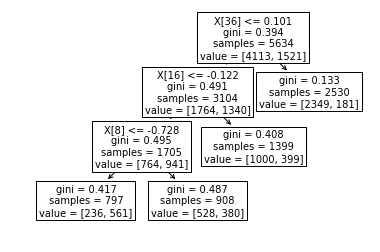

In [0]:
# Plot the tree
tree.plot_tree(dtc.fit(X_train, y_train)) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


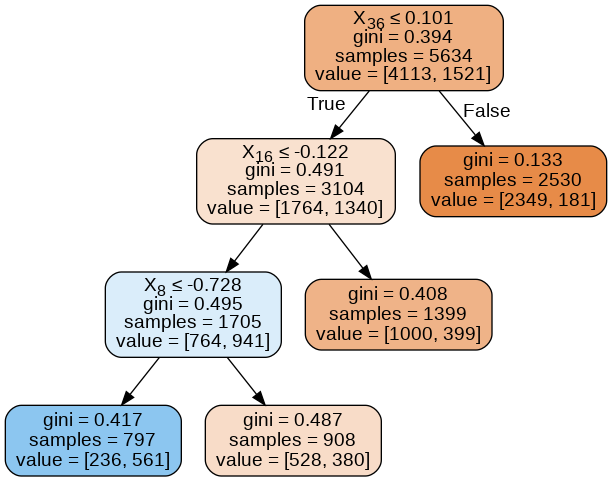

In [0]:
# Visualize with graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
# Import the metrics class
from sklearn import metrics

# Show the Confussion Matrix
cnf_matrixdtc = metrics.confusion_matrix(y_test, y_preddtc)
cnf_matrixdtc

array([[997,  64],
       [217, 131]])

In [0]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_preddtc)
prec_dtc = metrics.precision_score(y_test, y_preddtc)
rec_dtc = metrics.recall_score(y_test, y_preddtc)
f1_dtc = metrics.f1_score(y_test, y_preddtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_preddtc)

print("Accuracy:", acc_dtc )
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.8005677785663591
Precision: 0.6717948717948717
Recall: 0.3764367816091954
F1 Score: 0.4825046040515653
Cohens Kappa Score: 0.3709091833540684


In [0]:
# Cross-validation score
cv_iterations = 5
cv_score = cross_val_score(dtc, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

Accuracy with cross-validation (split size = 5): 0.79 (+/- 0.02)


In [0]:
# ROC Curve
y_pred_probadtc = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_probadtc)
aucdtc = metrics.roc_auc_score(y_test, y_pred_probadtc)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.legend(loc=4)
plt.show()

NameError: ignored

#### K-Nearest Neighbor
We use Scikit Learn KNeighborsClassifier function. Here is the default parameter:

`KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)`

A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).

In [0]:
#Import library
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors= 83)
knn.fit(X_train, y_train)

#Predict to test data
y_predknn = knn.predict(X_test)

In [0]:
# Show the Confussion Matrix
cnf_matrixknn = metrics.confusion_matrix(y_test, y_predknn)
cnf_matrixknn

array([[906, 155],
       [131, 217]])

In [0]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_predknn)
prec_knn = metrics.precision_score(y_test, y_predknn)
rec_knn = metrics.recall_score(y_test, y_predknn)
f1_knn = metrics.f1_score(y_test, y_predknn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_predknn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7970191625266146
Precision: 0.5833333333333334
Recall: 0.6235632183908046
F1 Score: 0.6027777777777779
Cohens Kappa Score: 0.46666084323317036


In [0]:
# Cross-validation score
cv_iterations = 10
cv_score = cross_val_score(knn, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

Accuracy with cross-validation (split size = 10): 0.79 (+/- 0.02)


In [0]:
# ROC Curve
y_pred_probaknn = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_probaknn)
aucknn = metrics.roc_auc_score(y_test, y_pred_probaknn)
plt.plot(fprknn,tprknn,label="K-NN, auc="+str(aucknn))
plt.legend(loc=4)
plt.show()

#### Naive Bayes
We use Scikit Learn [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) function. Here is the default parameter:

`class sklearn.naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09`


In [0]:
from sklearn.naive_bayes import GaussianNB 

#Train Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predgnb= gnb.predict(X_test)

In [0]:
# Show the Confussion Matrix
cnf_matrixgnb = metrics.confusion_matrix(y_test, y_predgnb)
cnf_matrixgnb

array([[813, 248],
       [ 74, 274]])

In [0]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_predgnb)
prec_gnb = metrics.precision_score(y_test, y_predgnb)
rec_gnb = metrics.recall_score(y_test, y_predgnb)
f1_gnb = metrics.f1_score(y_test, y_predgnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_predgnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7714691270404542
Precision: 0.524904214559387
Recall: 0.7873563218390804
F1 Score: 0.6298850574712643
Cohens Kappa Score: 0.4739843110520592


In [0]:
# Cross-validation score
cv_iterations = 10
cv_score = cross_val_score(gnb, train_feature, train_target, cv=cv_iterations)
print('Accuracy with cross-validation (split size = {}): {} (+/- {})'
      .format(cv_iterations, round(cv_score.mean(),2), round(cv_score.std() * 2,2)))

Accuracy with cross-validation (split size = 10): 0.76 (+/- 0.03)


In [0]:
# ROC Curve
y_pred_probagnb = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_probagnb)
aucgnb = metrics.roc_auc_score(y_test, y_pred_probagnb)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.legend(loc=4)
plt.show()

#### Model Comparison

In [0]:
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("k-NN Accuracy =", acc_knn)
print("k-NN Precision =", prec_knn)
print("k-NN Recall =", rec_knn)
print("k-NN F1-Score =", f1_knn)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Decision Tree Accuracy = 0.8005677785663591
Decision Tree Precision = 0.6717948717948717
Decision Tree Recall = 0.3764367816091954
Decision Tree F1-Score = 0.4825046040515653
_______________________
k-NN Accuracy = 0.7970191625266146
k-NN Precision = 0.5833333333333334
k-NN Recall = 0.6235632183908046
k-NN F1-Score = 0.6027777777777779
_______________________
Naive Bayes Accuracy = 0.7714691270404542
Naive Bayes Precision = 0.524904214559387
Naive Bayes Recall = 0.7873563218390804
Naive Bayes F1-Score = 0.6298850574712643


### Clustering

#### K-Means Clustering

In [0]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [0]:
# Import Dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/apriandito/bigdatacert/master/dataset/clustering.csv')

In [0]:
# Show 10 Rows of Dataset
dataset.head(10)

In [0]:
# Show lenght of Dataset
len(dataset) 

In [0]:
# Statistics Descriptive
dataset.describe().transpose()

In [0]:
#Visualising the data
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])

In [0]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

In [0]:
#Elbow
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
#Silhoutte
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [0]:
# Fitting Model with K-Means
km2=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km2.fit_predict(X)

In [0]:
# Visualising the clusters for k=2
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')


plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

#### Hierarchical Clustering

In [0]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [0]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

In [0]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

### Association

In [0]:
# Import Library
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
# Import dataset
retail_df = pd.read_excel("https://raw.githubusercontent.com/apriandito/bigdatacert/master/dataset/Online%20Retail.xlsx")
retail_df.head()

In [0]:
# Remove additional spaces
retail_df['Description'] = retail_df['Description'].str.strip()

# Remove NA values
retail_df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Remove cancelled orders
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [0]:
# Create Encode Function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

In [0]:
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [0]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [0]:
# Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()